# Solving with Simple Feed Forward Neural Network.

In [2]:
# Manipulations & Visualizations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer

# Feature Selection
from sklearn.feature_selection import SelectKBest,chi2

# Algorithm
from xgboost import XGBClassifier

#Pipeline
from sklearn.pipeline import Pipeline

# Metrics
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Others
import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display='diagram')

In [3]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import BinaryCrossentropy

In [5]:
df = pd.read_csv("Invistico_Airline.csv")
df.sample(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
88547,satisfied,Male,Loyal Customer,56,Business travel,Business,1057,1,1,2,...,4,3,3,4,3,3,3,3,0,0.0
72908,dissatisfied,Male,Loyal Customer,41,Business travel,Business,3417,2,4,4,...,3,2,2,2,2,3,2,4,6,6.0
46655,dissatisfied,Female,disloyal Customer,27,Business travel,Business,2034,2,2,2,...,1,1,4,5,5,3,5,1,0,0.0
109100,satisfied,Male,Loyal Customer,59,Business travel,Business,3894,4,4,4,...,4,4,4,4,5,4,4,4,0,0.0
108423,satisfied,Male,Loyal Customer,38,Business travel,Business,1820,2,2,2,...,4,4,4,4,4,3,4,4,0,0.0


In [6]:
df.shape

(129880, 23)

In [7]:
df.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [8]:
df = df.dropna()

# I am dropping missing values since its a very tiny portion compared to 129880 records.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
Seat comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
Online support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0


In [10]:
df.nunique()

satisfaction                            2
Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5397
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            464
Arrival Delay in Minutes              472
dtype: int64

<Axes: xlabel='satisfaction', ylabel='count'>

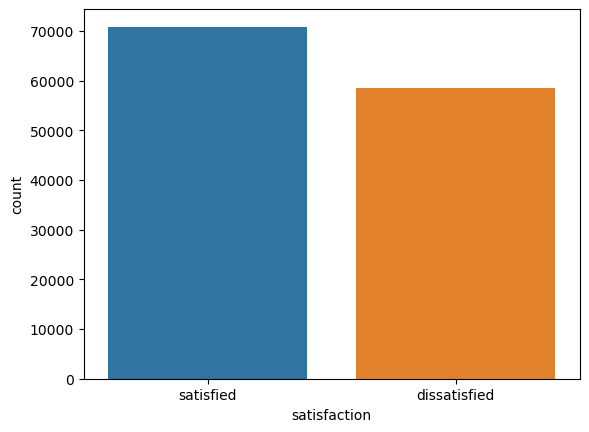

In [11]:
sns.countplot(x=df['satisfaction'])

# Target is alomst balanced. 

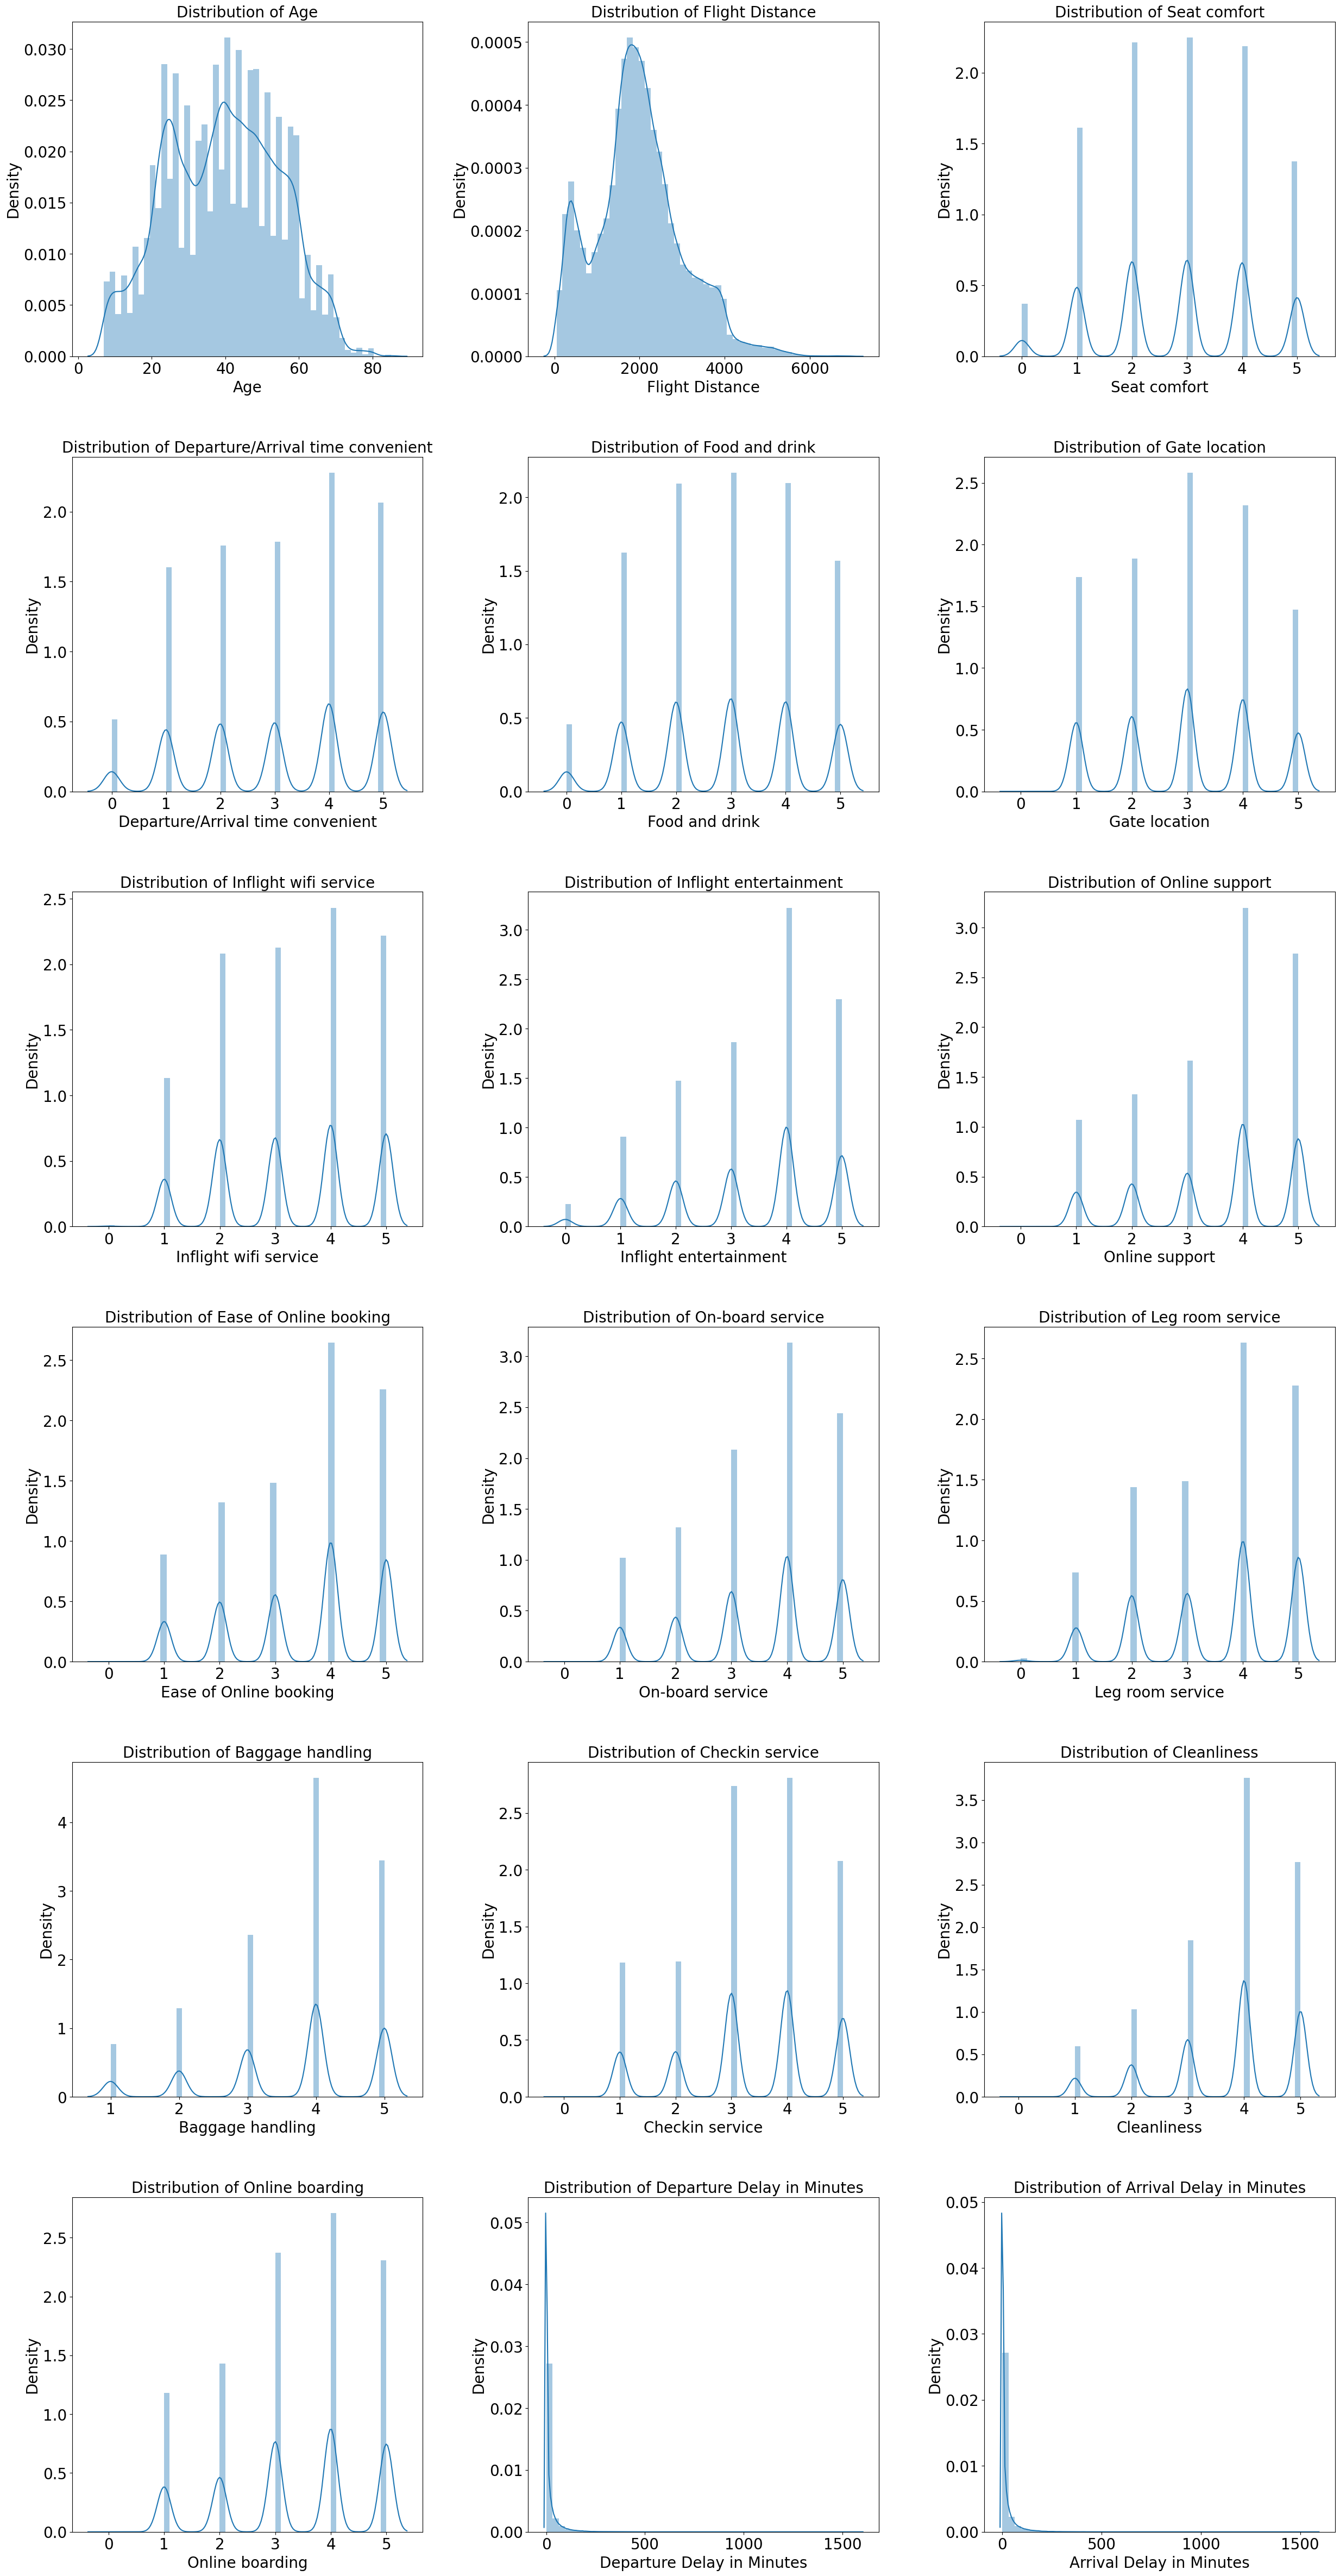

In [12]:
nrows = 6
ncols = 3

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*10, nrows*10))

for i, j in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    row = i // ncols
    col_idx = i % ncols
    sns.distplot(x=df[j], ax=axes[row, col_idx])
    axes[row, col_idx].set_xlabel(j, fontsize=20)
    axes[row, col_idx].set_ylabel('Density', fontsize=20)
    axes[row, col_idx].tick_params(axis='both', labelsize=20)
    axes[row, col_idx].set_title(f'Distribution of {j}', fontsize=20)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

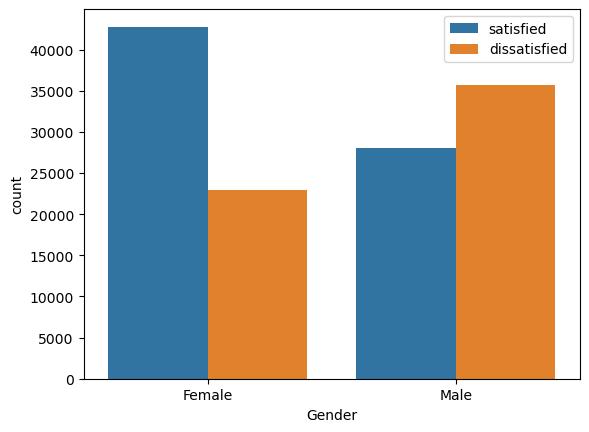

In [13]:
sns.countplot(x=df['Gender'],hue=df['satisfaction'])
plt.legend(loc='best')

# Women seem to be more satisfied than men in general.

<Axes: xlabel='Customer Type', ylabel='count'>

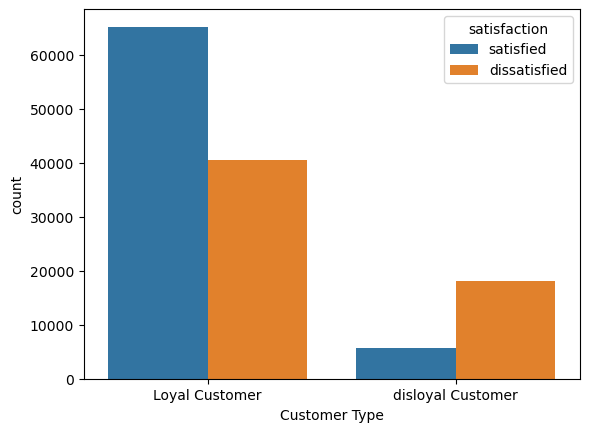

In [14]:
sns.countplot(x=df['Customer Type'],hue=df['satisfaction'])

# There seemed to be a lot of growing disastisfaction among loyal customers than disloyal. 
# We need to focus more on loyal customers as retaining them is more crucial than disloyal customers for the airline. 

<Axes: xlabel='Class', ylabel='count'>

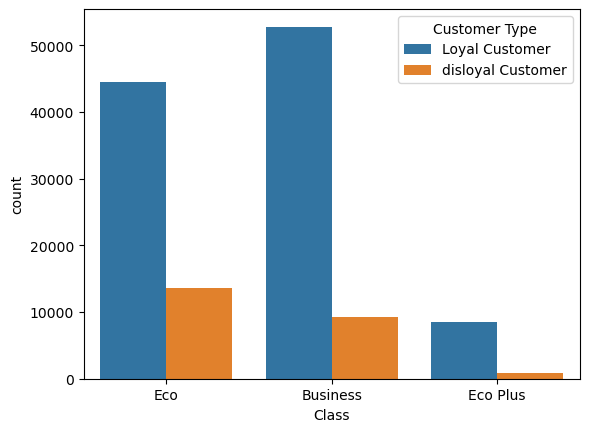

In [15]:
sns.countplot(hue=df['Customer Type'],x=df['Class'])

# there seem to be slightly more disloyal customers in Eco class than others. 

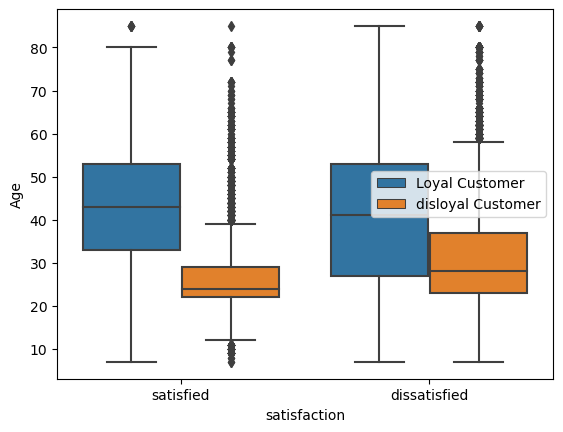

In [16]:
sns.boxplot(y=df['Age'],x=df['satisfaction'],hue=df['Customer Type'])
plt.legend(loc='best')

# There seem to be larger proportion of people who are disastisfied as well as disloyal. 
# It makes sense for disloyal customers to be disastisfied. 
# However, at the same time there are larger proportion of loyal customers who are dissatisfied as well. 

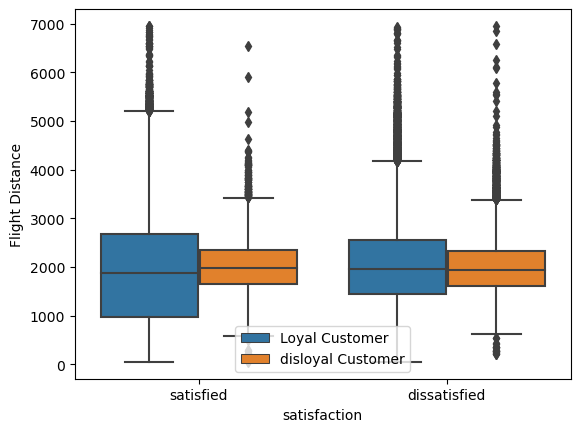

In [17]:
sns.boxplot(y=df['Flight Distance'],x=df['satisfaction'],hue=df['Customer Type'])
plt.legend(loc='best')

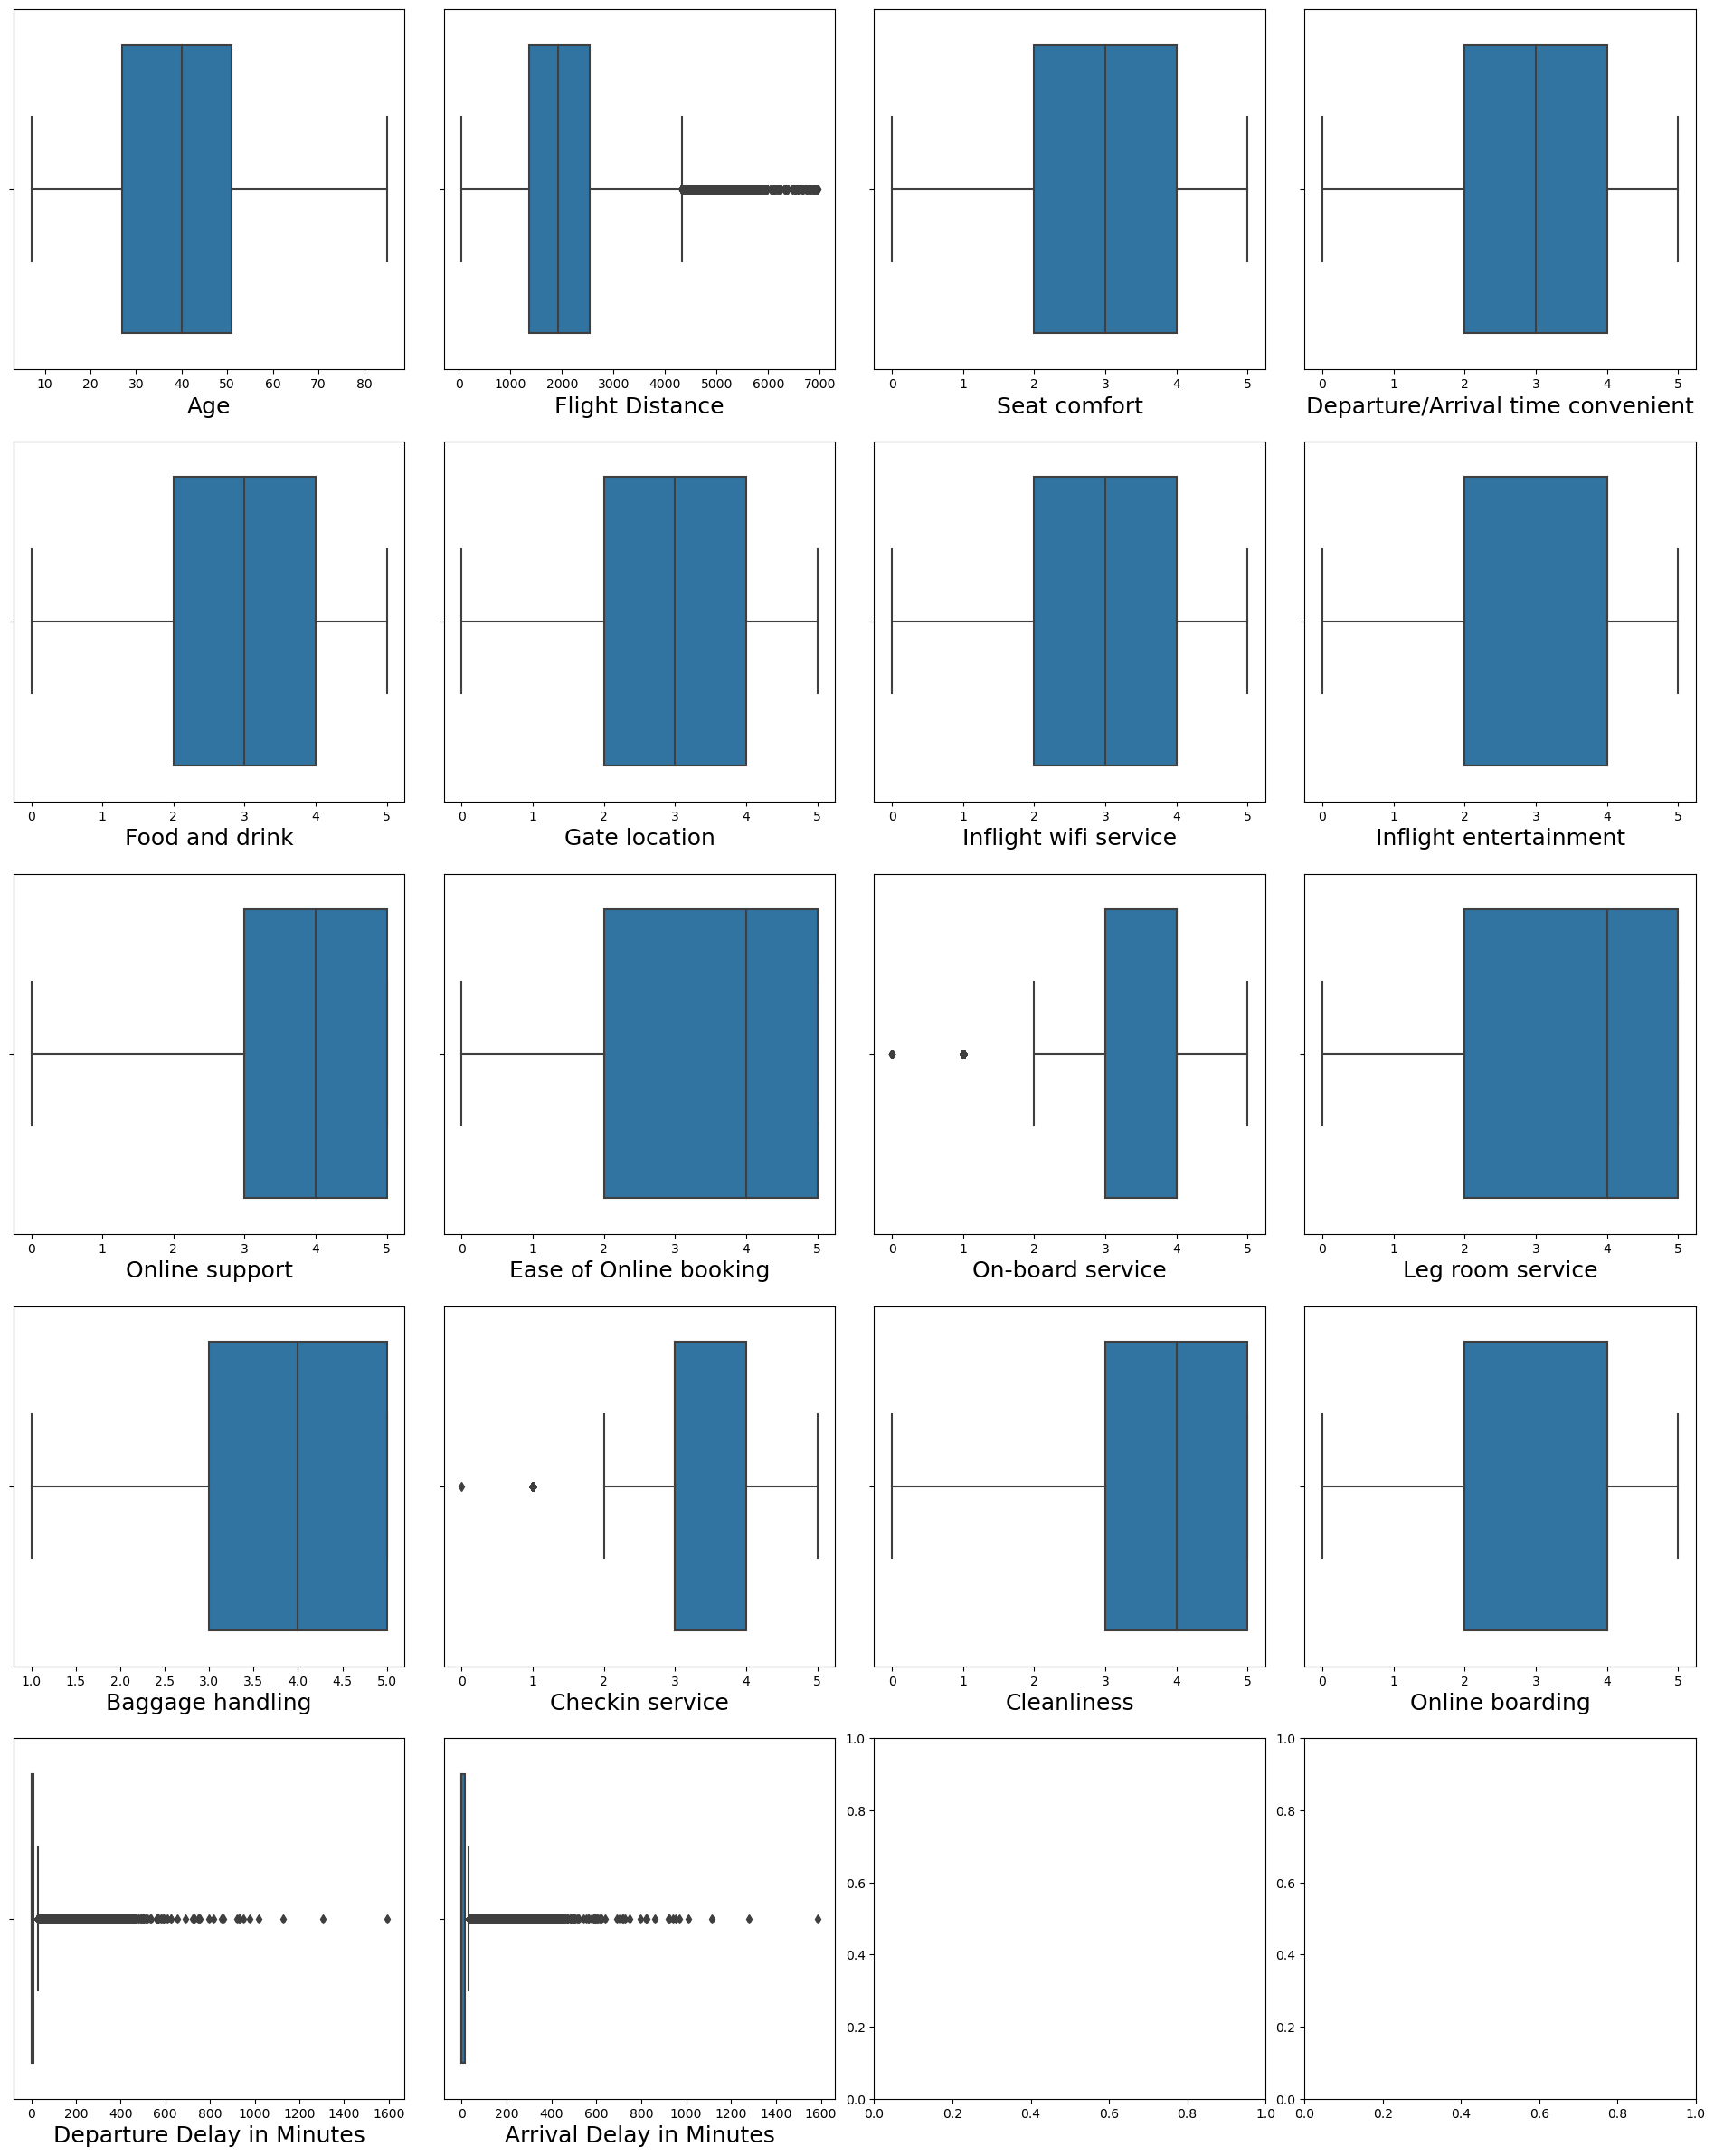

In [18]:
nrows = 5
ncols = 4

fig,axes = plt.subplots(nrows = nrows, ncols=ncols, figsize = (ncols*6, nrows*6))

for i, j in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
    row = i // ncols
    col_idx = i % ncols
    sns.boxplot(x=df[j], ax=axes[row, col_idx])
    axes[row, col_idx].set_xlabel(j, fontsize=18)

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

In [19]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [22]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [23]:
trf1 = ColumnTransformer([
    ('oe_cust_class', OrdinalEncoder(categories=[['disloyal Customer', 'Loyal Customer'],
                                                 ['Eco', 'Eco Plus', 'Business']],
                                    handle_unknown='use_encoded_value', unknown_value=-1), [1, 4]),
    ('ohe_sex_travel',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,3]),

], remainder='passthrough')

In [24]:
x_train_transformed = trf1.fit_transform(x_train)
x_test_transformed = trf1.transform(x_test)

In [25]:
ss = StandardScaler()

In [26]:
x_train_scaled = ss.fit_transform(x_train_transformed)
x_test_scaled = ss.transform(x_test_transformed)

In [27]:
model = Sequential()
model.add(Input(24))
model.add(Dense(units = 16, activation="relu"))
model.add(Dense(units = 12, activation="tanh"))
model.add(Dense(units = 8, activation="relu"))
model.add(Dense(units = 4, activation="tanh"))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.005), loss=BinaryCrossentropy(), metrics=[tf.keras.metrics.BinaryAccuracy()])

model.fit(x=x_train_scaled, y=y_train, epochs=200, batch_size=2000, validation_data=(x_test_scaled, y_test))

Epoch 1/200
44/44 [==============================] - 2s 18ms/step - loss: 0.4797 - binary_accuracy: 0.8042 - val_loss: 0.3598 - val_binary_accuracy: 0.8672
Epoch 2/200
44/44 [==============================] - 1s 12ms/step - loss: 0.3082 - binary_accuracy: 0.8866 - val_loss: 0.2681 - val_binary_accuracy: 0.9000
Epoch 3/200
44/44 [==============================] - 1s 21ms/step - loss: 0.2398 - binary_accuracy: 0.9103 - val_loss: 0.2233 - val_binary_accuracy: 0.9153
Epoch 4/200
44/44 [==============================] - 1s 14ms/step - loss: 0.2067 - binary_accuracy: 0.9207 - val_loss: 0.1987 - val_binary_accuracy: 0.9221
Epoch 5/200
44/44 [==============================] - 1s 29ms/step - loss: 0.1865 - binary_accuracy: 0.9264 - val_loss: 0.1797 - val_binary_accuracy: 0.9264
Epoch 6/200
44/44 [==============================] - 1s 15ms/step - loss: 0.1725 - binary_accuracy: 0.9306 - val_loss: 0.1701 - val_binary_accuracy: 0.9303
Epoch 7/200
44/44 [==============================] - 1s 16ms/ste

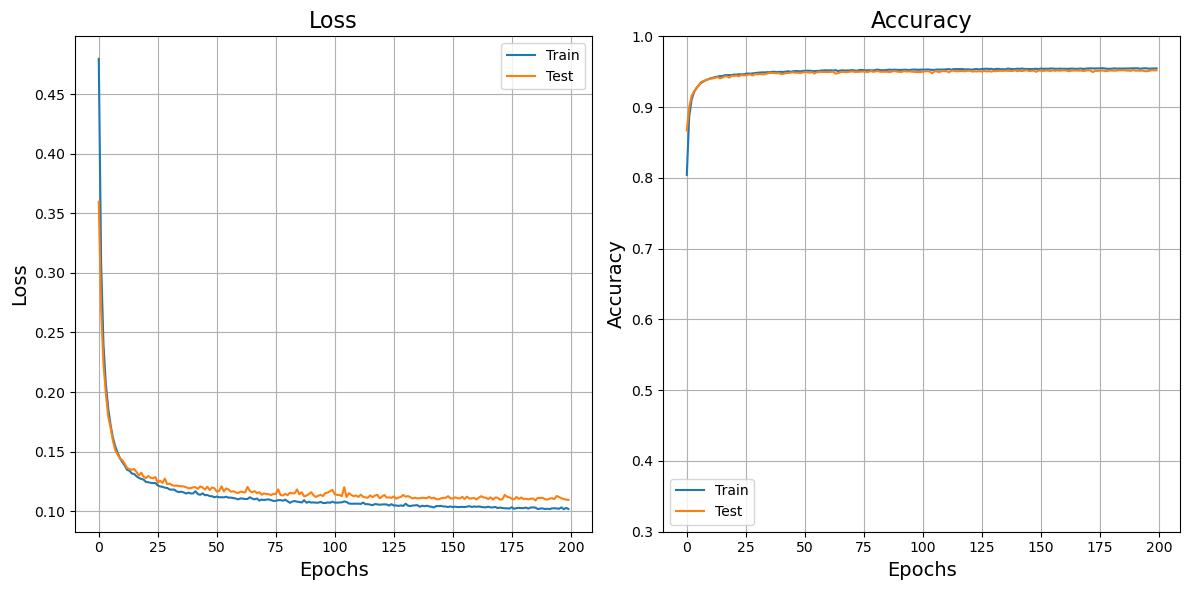

In [28]:
plt.figure(figsize=(12, 6))

train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

train_acc = model.history.history["binary_accuracy"]
val_acc = model.history.history["val_binary_accuracy"]

plt.subplot(1, 2, 1)
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs", fontsize=14)  
plt.ylabel("Loss", fontsize=14)   
plt.legend(["Train", "Test"])
plt.grid()
plt.title("Loss",fontsize=16)

plt.subplot(1, 2, 2)
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs", fontsize=14)  
plt.ylabel("Accuracy", fontsize=14) 
plt.ylim(0.3, 1)
plt.legend(["Train", "Test"])
plt.grid()
plt.title("Accuracy",fontsize=16)

plt.tight_layout()
plt.show()

In [29]:
# Used same test data for predictions.

In [30]:
predictions = model.predict(x_test_scaled)

1336/1336 [==============================] - 4s 3ms/step


In [31]:
rounded_predictions = np.round(predictions)

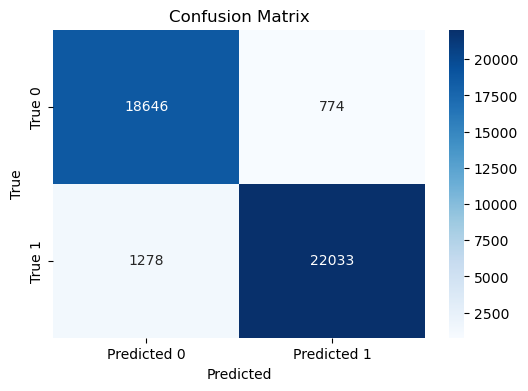

In [32]:
cm = confusion_matrix(y_test, rounded_predictions)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
accuracy = accuracy_score(y_test, rounded_predictions)
precision = precision_score(y_test, rounded_predictions)
recall = recall_score(y_test, rounded_predictions)
f1 = f1_score(y_test, rounded_predictions)
roc_auc = roc_auc_score(y_test, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.9519786571809693
Precision: 0.9660630508177314
Recall: 0.9451760971215306
F1 Score: 0.9555054425603886
ROC-AUC: 0.9922216932720199


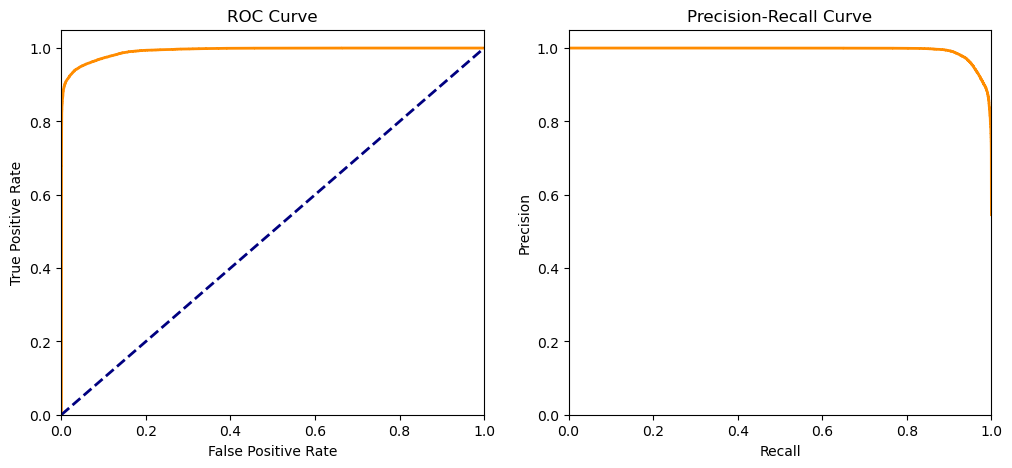

In [34]:
fpr, tpr, _ = roc_curve(y_test, predictions)
precision, recall, _ = precision_recall_curve(y_test, predictions)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.show()

In [35]:
model.save('Simple FNN')

# loaded_model = tf.keras.models.load_model('my_model')

INFO:tensorflow:Assets written to: Simple FNN\assets
